In [4]:
# 사용할 패키지 가져오기

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

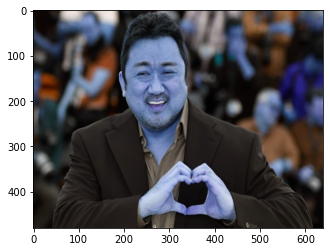

In [2]:
# 이미지 경로 설정 및 불러오기

my_img_path = os.getenv("HOME") +'/camera_sticker/images/image2.jpg'
img_bgr = cv2.imread(my_img_path)
img_bgr = cv2.resize(img_bgr, (640, 480))
img_show = img_bgr.copy()

plt.imshow(img_bgr)
plt.show()

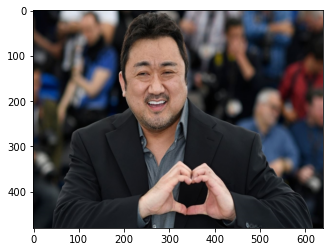

In [3]:
# RGB 사진으로 재변환

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

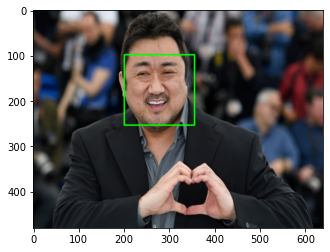

In [6]:
# dlib hog 선언, dector을 통한 얼굴 bounding box 추출

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)    # image, num of img pyramid


# 녹색 테두리로 감지된 얼굴 출력
for dlib_rect in dlib_rects :
    # dlib_rects 에 저장된 detector_hog 로 찾은 좌표를 dlib_rect 로 저장
    # l, t, r, b 좌표를 각각 저장
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType = cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

rectangles[[(201, 98) (356, 253)]]


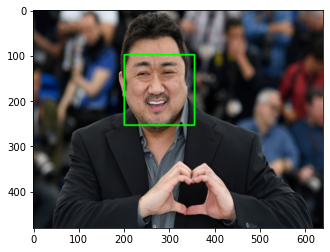

In [7]:
# 얼굴 영역 좌표를 찾고 출력

print(dlib_rects)    # 찾은 얼굴 영역 좌표

for dlib_rect in dlib_rects :
    # dlib_rects 에 저장된 detector_hog 로 찾은 좌표를 dlib_rect 로 저장
    # l, t, r, b 좌표를 각각 저장
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2, lineType = cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()    

In [8]:
# 저장된 landmark 모델을 불러오기

model_path = os.getenv("HOME") + '/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks= []


for dlib_rect in dlib_rects :
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p : (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


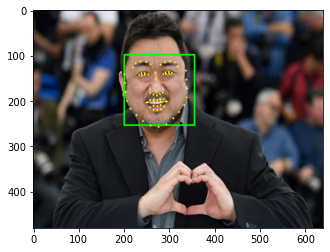

In [9]:
# 랜드마크를 영상에 출력

for landmark in list_landmarks :
    for idx, point in enumerate(list_points) : 
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [11]:
# 스티커 적용을 위한 좌표 확인 (코의 중심점 확인)

for dlib_rect, landmakr in zip(dlib_rects, list_landmarks) : 
    
    # 코 중심위치 확인
    print(landmark[33])
    
    x = landmark[3][0] - dlib_rect.width() // 15
    y = landmark[33][1] - dlib_rect.width() // 2
    
    # 스티커 크기
    w = dlib_rect.width()
    h = dlib_rect.width()
    
    print('(x, y) : (%d, %d)' %(x, y))
    print('(w, h) : (%d, %d)' %(w, h))

(273, 188)
(x, y) : (197, 110)
(w, h) : (156, 156)


In [12]:
# 스티커 이미지를 적용 (스티커를 윗 단계에서 계산한 크기로 resize)

sticker_path = os.getenv("HOME") + '/camera_sticker/images/cat_whisker2.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

print(img_sticker.shape)

(156, 156, 3)


In [13]:
# 이미지에 스티커 적용

sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker == 0,sticker_area,img_sticker).astype(np.uint8)

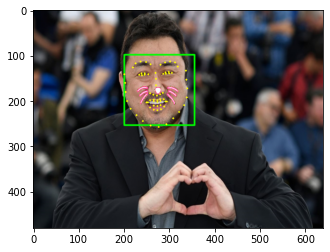

In [14]:
# 스티커 적용한 이미지 출력

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

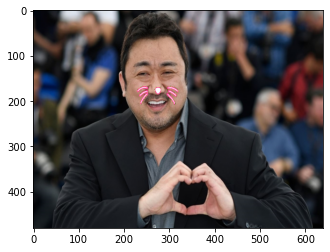

In [15]:
# 최종 결과
sticker_area = img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_bgr[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker == 0,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()